In [22]:
import pathlib
import os, sys
import numpy as np
from loguru import logger
from collections import defaultdict
from openset_imagenet.util import ccr_at_fpr
import openset_imagenet
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [23]:
net_11 = np.load('net_11.npz')

print(net_11.files)

['gt', 'logits', 'features', 'scores']


In [24]:
print(net_11['gt'].shape)
print(net_11['scores'].shape)
print(net_11['scores'][0])
print(net_11['gt'][0])

(5800,)
(5800, 30)
[99.81329  51.942867 41.004677 62.957188 48.95328  63.013813 48.00798
 49.961754 58.02245  47.081688 44.061653 41.074287 42.99276  49.996246
 39.031742 45.019035 39.065205 45.003525 48.97348  47.976894 53.99011
 45.050987 55.004845 44.9893   45.99373  47.99371  43.030704 49.99448
 45.010925 54.987408]
0.0


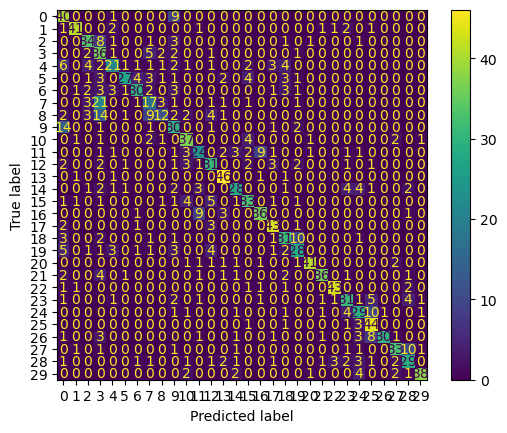

In [31]:
# print confusion matrix for each gt label except -1 (unknown)
gt = net_11['gt']
scores = net_11['scores']
kn = gt >= 0

predicted_class = np.argmax(scores, axis=1)

cm = confusion_matrix(gt[kn], predicted_class[kn])
ConfusionMatrixDisplay(cm).plot()



In [26]:
# for each class in gt sum the scores of this class
class_scores = defaultdict(list)
for i, label in enumerate(gt):
    if label >= 0:
        class_scores[label].append(scores[i][int(label)])
    elif label == -1:
        class_scores[-1].append(max(scores[i]))
  

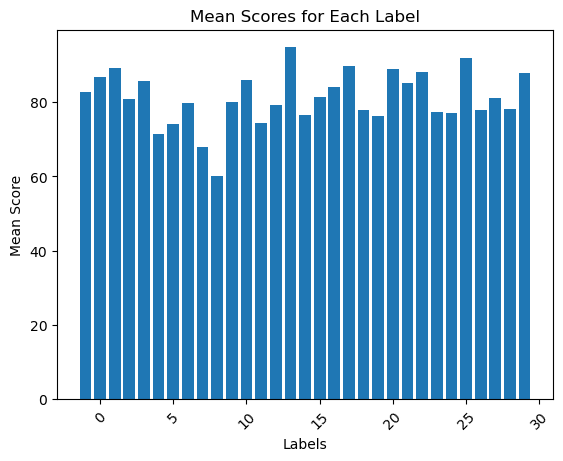

In [29]:
labels = list(class_scores.keys())  # Get the list of labels
mean_scores = [sum(scores) / len(scores) for scores in class_scores.values()]  # Calculate the mean score for each class

# Create the plot
fig, ax = pyplot.subplots()
ax.bar(labels, mean_scores)
ax.set_xlabel('Labels')
ax.set_ylabel('Mean Score')
ax.set_title('Mean Scores for Each Label')

# Rotate the x-axis labels for better visibility
pyplot.xticks(rotation=45)

# Show the plot
pyplot.show()
